In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const 
phi_gold =const.golden_ratio

from classy import Class

In [2]:
# esthetic definitions for the plots
font = {'size'   : 14, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
# matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,8.0]

In [16]:
# Varying parameter (others fixed to default)
#
fixed_settings = {
                'T_cmb':2.73,
                'omega_b':0.022032,
                'omega_cdm':0.12038,
                'h':0.67556,
                'A_s':2.215e-9,
                'n_s':0.9619,
                'output':'mPk',
                # 'lensing':'yes',
                # 'k_output_values':0.05,
                'P_k_max_1/Mpc':3.0,
                'format':'camb'
                }

In [17]:
cosmo = Class()
cosmo.set(fixed_settings)
cosmo.compute()

## Matter power spectrum

In [26]:
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = cosmo.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(cosmo.pk(k*h,0.)*h**3) # function .pk(k,z)

cosmo.empty()
cosmo.struct_cleanup()

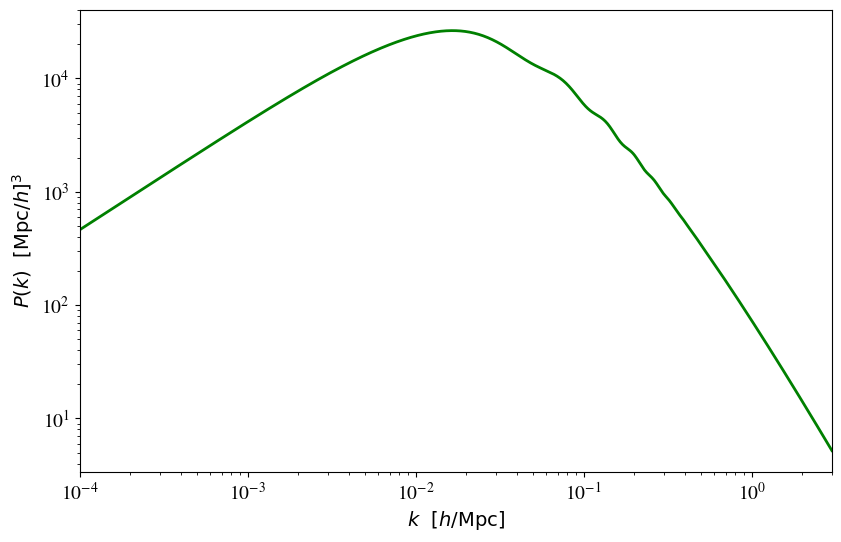

In [27]:
# Plotting matter power spectrum
# plt.xscale('log')
# plt.yscale('log')
plt.subplots(figsize=(6*phi_gold, 6))
plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.loglog(kk,Pk,'g', lw=2)

plt.savefig('linear_Pk.pdf')